In [187]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar -xvf spark-3.0.1-bin-hadoop3.2.tgz
!pip install -q findspark

spark-3.0.1-bin-hadoop3.2/
spark-3.0.1-bin-hadoop3.2/RELEASE
spark-3.0.1-bin-hadoop3.2/examples/
spark-3.0.1-bin-hadoop3.2/examples/src/
spark-3.0.1-bin-hadoop3.2/examples/src/main/
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/apache/
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/FPGrowthExample.scala
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/GBTExample.scala
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/ALSExample.scala
spark-3.0.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/KMeansExample.scala
spark-3.0.1-bin-hadoop3.2/example

In [188]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

In [189]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext

sc = SparkContext.getOrCreate();
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [190]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('stroke').getOrCreate()

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
# This Python 3 environment comes with many helpful analytics libraries installed 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import missingno as mno # display missing data
import os
print(os.listdir("/content/drive/MyDrive/introToFADS/ue4"))
# Any results you write to the current directory are saved as output
#list the files in the input directory

['Focus Areas for DS - WS20-21 - week4.pdf', 'Focus Areas for DS - WS20-21 - week4__project.pdf', 'sample_svm_data.txt', 'test.csv', 'train.csv', 'Copy of Spark3.0.1_on_Colaboratory.ipynb', 'IntroToFA_proj4_task1 (1).ipynb', 'IntroToFA_proj4_task1  (1).ipynb', 'IntroToFA_proj4_task1.ipynb', 'Copy of  IntroToFA_proj4_task1+2.ipynb', 'Copy of _IntroToFA_proj4_task1+2.ipynb', '_IntroToFA_proj4_task1+2.ipynb']


###Exploring the training data

In [193]:
#loading data using spark
train = spark.read.csv("/content/drive/MyDrive/introToFADS/ue4/train.csv", inferSchema=True,header=True)
test = spark.read.csv("/content/drive/MyDrive/introToFADS/ue4/test.csv", inferSchema=True,header=True)

In [194]:
train.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [195]:
train.dtypes

[('id', 'int'),
 ('gender', 'string'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('ever_married', 'string'),
 ('work_type', 'string'),
 ('Residence_type', 'string'),
 ('avg_glucose_level', 'double'),
 ('bmi', 'double'),
 ('smoking_status', 'string'),
 ('stroke', 'int')]

In [196]:
train.head(5)

[Row(id=30669, gender='Male', age=3.0, hypertension=0, heart_disease=0, ever_married='No', work_type='children', Residence_type='Rural', avg_glucose_level=95.12, bmi=18.0, smoking_status=None, stroke=0),
 Row(id=30468, gender='Male', age=58.0, hypertension=1, heart_disease=0, ever_married='Yes', work_type='Private', Residence_type='Urban', avg_glucose_level=87.96, bmi=39.2, smoking_status='never smoked', stroke=0),
 Row(id=16523, gender='Female', age=8.0, hypertension=0, heart_disease=0, ever_married='No', work_type='Private', Residence_type='Urban', avg_glucose_level=110.89, bmi=17.6, smoking_status=None, stroke=0),
 Row(id=56543, gender='Female', age=70.0, hypertension=0, heart_disease=0, ever_married='Yes', work_type='Private', Residence_type='Rural', avg_glucose_level=69.04, bmi=35.9, smoking_status='formerly smoked', stroke=0),
 Row(id=46136, gender='Male', age=14.0, hypertension=0, heart_disease=0, ever_married='No', work_type='Never_worked', Residence_type='Rural', avg_glucose_l

In [197]:
train.toPandas().head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,None,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,None,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,None,0


###Lets also look at test data

In [198]:
test.describe().show()

+-------+------------------+------+------------------+-------------------+--------------------+------------+---------+--------------+------------------+------------------+---------------+
|summary|                id|gender|               age|       hypertension|       heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi| smoking_status|
+-------+------------------+------+------------------+-------------------+--------------------+------------+---------+--------------+------------------+------------------+---------------+
|  count|             18601| 18601|             18601|              18601|               18601|       18601|    18601|         18601|             18601|             18010|          12850|
|   mean| 36747.36804472878|  null|42.056504489006024|0.09316703403042847|0.048061932154185256|        null|     null|          null| 104.3863593355191|28.545324819544625|           null|
| stddev|21053.151123778684|  null|22.528017622414048|0.2906

###Lets look the the target distribution

In [199]:
train.groupBy('stroke').count().show()

+------+-----+
|stroke|count|
+------+-----+
|     1|  783|
|     0|42617|
+------+-----+



As can be seen from this observation. This is an Imbalanced dataset, where the number of observations belonging to one class is significantly lower than those belonging to the other classes. In this case, the predictive model could be biased and inaccurate. There are different strategies to handling Imbalanced Datasets, We will look into it later.

([<matplotlib.axis.XTick at 0x7fb8087d1c18>,
 [Text(0, 0, '1'), Text(0, 0, '0')])

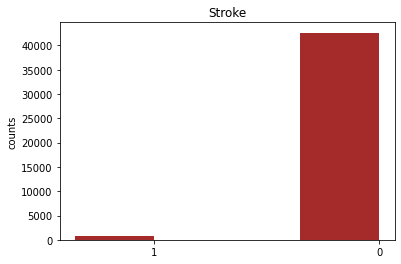

In [200]:
responses = train.groupBy('stroke').count().collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('Stroke')
plt.xticks(ind + width/2., categories)

###Training feature analysis

In [201]:
# create DataFrame as a temporary view for SQL queries
train.createOrReplaceTempView('table')

influence of work type on getting stroke

In [202]:
# sql query to find the number of people in specific work_type who have had stroke and not
spark.sql("SELECT work_type, COUNT(work_type) as work_type_count FROM table WHERE stroke == 1 GROUP BY work_type ORDER BY COUNT(work_type) DESC").show()
spark.sql("SELECT work_type, COUNT(work_type) as work_type_count FROM table WHERE stroke == 0 GROUP BY work_type ORDER BY COUNT(work_type) DESC").show()

+-------------+---------------+
|    work_type|work_type_count|
+-------------+---------------+
|      Private|            441|
|Self-employed|            251|
|     Govt_job|             89|
|     children|              2|
+-------------+---------------+

+-------------+---------------+
|    work_type|work_type_count|
+-------------+---------------+
|      Private|          24393|
|Self-employed|           6542|
|     children|           6154|
|     Govt_job|           5351|
| Never_worked|            177|
+-------------+---------------+



([<matplotlib.axis.XTick at 0x7fb7fba670b8>,
 [Text(0, 0, 'Private'),
  Text(0, 0, 'Self-employed'),
  Text(0, 0, 'Govt_job'),
  Text(0, 0, 'children')])

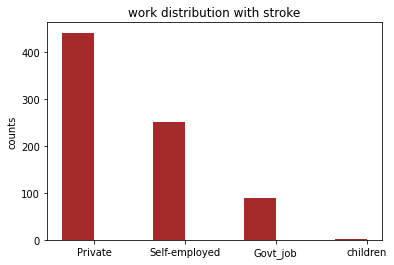

In [203]:
responses=spark.sql("SELECT work_type, COUNT(work_type) as work_type_count FROM table WHERE stroke == 1 GROUP BY work_type ORDER BY COUNT(work_type) DESC").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('work distribution with stroke')
plt.xticks(ind + width/2., categories)

([<matplotlib.axis.XTick at 0x7fb7faf5b1d0>,
 [Text(0, 0, 'Private'),
  Text(0, 0, 'Self-employed'),
  Text(0, 0, 'children'),
  Text(0, 0, 'Govt_job'),
  Text(0, 0, 'Never_worked')])

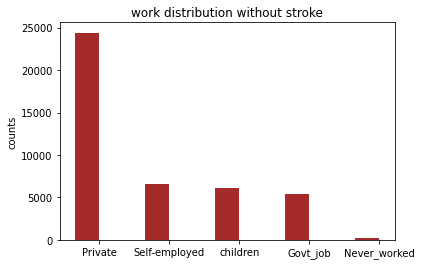

In [204]:
responses= spark.sql("SELECT work_type, COUNT(work_type) as work_type_count FROM table WHERE stroke == 0 GROUP BY work_type ORDER BY COUNT(work_type) DESC").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('work distribution without stroke')
plt.xticks(ind + width/2., categories)

It is mostly happening to private or self-employed person.

Here it will be checked if it is related to gender

In [205]:
spark.sql("SELECT gender, count(gender) as count_gender, count(gender)*100/sum(count(gender)) over() as percent FROM table GROUP BY gender").show()
spark.sql("SELECT gender, COUNT(gender) as gender_count, COUNT(gender)*100/(SELECT COUNT(gender) FROM table WHERE gender == 'Male') as percentage FROM table WHERE stroke== 1 AND gender = 'Male' GROUP BY gender").show()
spark.sql("SELECT gender, COUNT(gender) as gender_count, COUNT(gender)*100/(SELECT COUNT(gender) FROM table WHERE gender == 'Female') as percentage FROM table WHERE stroke== 1 AND gender = 'Female' GROUP BY gender").show()

+------+------------+-------------------+
|gender|count_gender|            percent|
+------+------------+-------------------+
|Female|       25665|  59.13594470046083|
| Other|          11|0.02534562211981567|
|  Male|       17724|  40.83870967741935|
+------+------------+-------------------+

+------+------------+------------------+
|gender|gender_count|        percentage|
+------+------------+------------------+
|  Male|         352|1.9860076732114647|
+------+------------+------------------+

+------+------------+------------------+
|gender|gender_count|        percentage|
+------+------------+------------------+
|Female|         431|1.6793298266121177|
+------+------------+------------------+



([<matplotlib.axis.XTick at 0x7fb7faed56a0>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Other'), Text(0, 0, 'Male')])

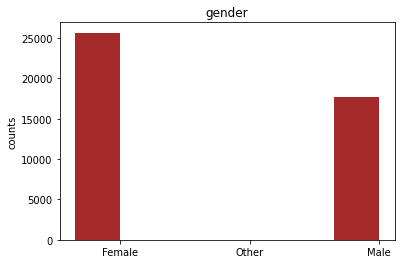

In [206]:
responses = spark.sql("SELECT gender, count(gender) as count_gender, count(gender)*100/sum(count(gender)) over() as percent FROM table GROUP BY gender").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('gender')
plt.xticks(ind + width/2., categories)


([<matplotlib.axis.XTick at 0x7fb7fad261d0>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

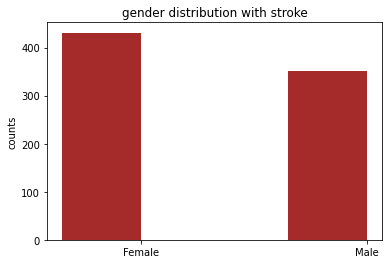

In [207]:
responses=spark.sql("SELECT gender, COUNT(gender) as gender_count, COUNT(gender) FROM table WHERE stroke== 1 GROUP BY gender").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('gender distribution with stroke')
plt.xticks(ind + width/2., categories)

2% male and almost 1.68% female had stroke.

Now we will see influence of age on stroke

In [208]:
spark.sql("SELECT age, count(age) as age_count FROM table WHERE stroke == 1 GROUP BY age ORDER BY age_count DESC").show()
print(train.filter((train['stroke'] == 1) & (train['age'] > '50')).count())



+----+---------+
| age|age_count|
+----+---------+
|79.0|       70|
|78.0|       57|
|80.0|       49|
|81.0|       43|
|82.0|       36|
|70.0|       25|
|74.0|       24|
|77.0|       24|
|76.0|       24|
|75.0|       23|
|67.0|       23|
|72.0|       21|
|69.0|       20|
|68.0|       20|
|59.0|       20|
|71.0|       19|
|57.0|       19|
|63.0|       18|
|65.0|       18|
|66.0|       17|
+----+---------+
only showing top 20 rows

708


In [209]:
spark.sql("SELECT COUNT(age)*100/(SELECT COUNT(age) FROM table WHERE stroke ==1) as percentage FROM table WHERE stroke == 1 AND age>=50").show()

+-----------------+
|       percentage|
+-----------------+
|91.57088122605364|
+-----------------+



Text(0.5, 1.0, 'age distribution with stroke')

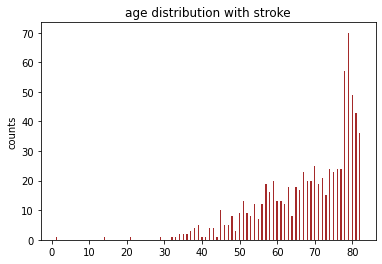

In [210]:
responses=spark.sql("SELECT age, count(age) as age_count FROM table WHERE stroke == 1 GROUP BY age ORDER BY age DESC").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
#plt.figure(figsize=(10, 5))
plt.bar(categories, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('age distribution with stroke')

Here we see that 91.5% stroke had occured for person who are more than 50 years old

In [211]:
spark.sql("SELECT bmi, count(bmi) as bmi_count FROM table WHERE stroke == 1 GROUP BY bmi ORDER BY bmi_count DESC").show()
print(train.filter((train['stroke'] == 1) & (train['bmi'] < 35)).count())

+----+---------+
| bmi|bmi_count|
+----+---------+
|26.4|        9|
|31.4|        9|
|26.6|        9|
|30.9|        9|
|27.5|        8|
|30.7|        8|
|31.5|        8|
|24.2|        7|
|25.8|        7|
|28.5|        7|
|28.0|        6|
|30.6|        6|
|30.3|        6|
|27.0|        6|
|27.3|        6|
|25.0|        6|
|29.3|        6|
|27.7|        6|
|29.7|        6|
|25.6|        6|
+----+---------+
only showing top 20 rows

526


In [212]:
spark.sql("SELECT COUNT(bmi)*100/(SELECT COUNT(bmi) FROM table WHERE stroke ==1) as percentage FROM table WHERE stroke == 1 AND bmi<35").show()

+----------------+
|      percentage|
+----------------+
|81.8040435458787|
+----------------+



Text(0.5, 1.0, 'bmi distribution with stroke')

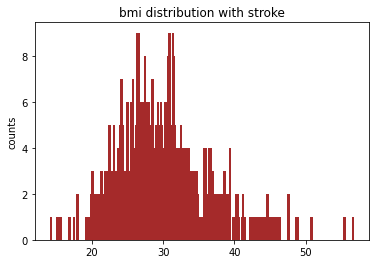

In [213]:
responses=spark.sql("SELECT bmi, count(bmi) as bmi_count FROM table WHERE stroke == 1 GROUP BY bmi ORDER BY bmi").collect()
categories = [i[0] for i in responses]
categories.remove(categories[0])
counts = [i[1] for i in responses]
counts.remove(counts[0])
ind = np.array(range(len(categories)))
width = 0.35
#plt.figure(figsize=(25, 5))
plt.bar(categories, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('bmi distribution with stroke')

In [214]:
spark.sql("SELECT hypertension, count(hypertension) as count_hypertension, count(hypertension)*100/sum(count(hypertension)) over() as percent FROM table GROUP BY hypertension").show()
spark.sql("SELECT hypertension, COUNT(hypertension) as hypertension_count, COUNT(hypertension)*100/(SELECT COUNT(hypertension) FROM table WHERE hypertension == 0) as percentage FROM table WHERE stroke== 1 AND hypertension == 0 GROUP BY hypertension").show()
spark.sql("SELECT hypertension, COUNT(hypertension) as hypertension_count, COUNT(hypertension)*100/(SELECT COUNT(hypertension) FROM table WHERE hypertension == 1) as percentage FROM table WHERE stroke== 1 AND hypertension == 1 GROUP BY hypertension").show()

+------------+------------------+-----------------+
|hypertension|count_hypertension|          percent|
+------------+------------------+-----------------+
|           1|              4061|9.357142857142858|
|           0|             39339|90.64285714285714|
+------------+------------------+-----------------+

+------------+------------------+-----------------+
|hypertension|hypertension_count|       percentage|
+------------+------------------+-----------------+
|           0|               583|1.481989882813493|
+------------+------------------+-----------------+

+------------+------------------+-----------------+
|hypertension|hypertension_count|       percentage|
+------------+------------------+-----------------+
|           1|               200|4.924895345973898|
+------------+------------------+-----------------+



([<matplotlib.axis.XTick at 0x7fb7fba40da0>,
 [Text(0, 0, '1'), Text(0, 0, '0')])

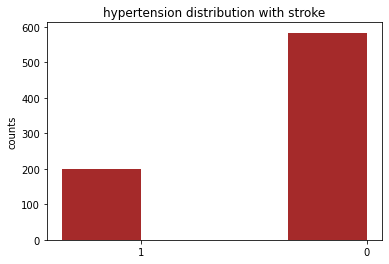

In [215]:
responses=spark.sql("SELECT hypertension, COUNT(hypertension) as hypertension_count, COUNT(hypertension) FROM table WHERE stroke== 1 GROUP BY hypertension").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('hypertension distribution with stroke')
plt.xticks(ind + width/2., categories)

In [216]:
spark.sql("SELECT heart_disease, count(heart_disease) as count_heart_disease, count(heart_disease)*100/sum(count(heart_disease)) over() as percent FROM table GROUP BY heart_disease").show()
spark.sql("SELECT heart_disease, COUNT(heart_disease) as heart_disease_count, COUNT(heart_disease)*100/(SELECT COUNT(heart_disease) FROM table WHERE heart_disease == 0) as percentage FROM table WHERE stroke== 1 AND heart_disease == 0 GROUP BY heart_disease").show()
spark.sql("SELECT heart_disease, COUNT(heart_disease) as heart_disease_count, COUNT(heart_disease)*100/(SELECT COUNT(heart_disease) FROM table WHERE heart_disease == 1) as percentage FROM table WHERE stroke== 1 AND heart_disease == 1 GROUP BY heart_disease").show()

+-------------+-------------------+-----------------+
|heart_disease|count_heart_disease|          percent|
+-------------+-------------------+-----------------+
|            1|               2062|4.751152073732719|
|            0|              41338|95.24884792626727|
+-------------+-------------------+-----------------+

+-------------+-------------------+-----------------+
|heart_disease|heart_disease_count|       percentage|
+-------------+-------------------+-----------------+
|            0|                606|1.465963520247714|
+-------------+-------------------+-----------------+

+-------------+-------------------+-----------------+
|heart_disease|heart_disease_count|       percentage|
+-------------+-------------------+-----------------+
|            1|                177|8.583899127061105|
+-------------+-------------------+-----------------+



([<matplotlib.axis.XTick at 0x7fb7fb9886d8>,
 [Text(0, 0, '1'), Text(0, 0, '0')])

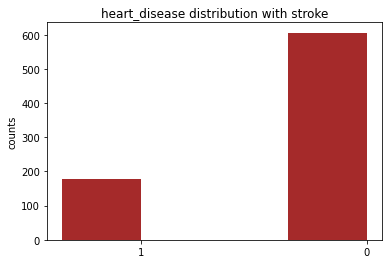

In [217]:
responses=spark.sql("SELECT heart_disease, COUNT(heart_disease) as heart_disease_count, COUNT(heart_disease) FROM table WHERE stroke== 1 GROUP BY heart_disease").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('heart_disease distribution with stroke')
plt.xticks(ind + width/2., categories)

In [218]:
spark.sql("SELECT ever_married, count(ever_married) as count_ever_married, count(ever_married)*100/sum(count(ever_married)) over() as percent FROM table GROUP BY ever_married").show()
spark.sql("SELECT ever_married, COUNT(ever_married) as ever_married_count, COUNT(ever_married)*100/(SELECT COUNT(ever_married) FROM table WHERE ever_married == 'Yes') as percentage FROM table WHERE stroke== 1 AND ever_married = 'Yes' GROUP BY ever_married").show()
spark.sql("SELECT ever_married, COUNT(ever_married) as ever_married_count, COUNT(ever_married)*100/(SELECT COUNT(ever_married) FROM table WHERE ever_married == 'No') as percentage FROM table WHERE stroke== 1 AND ever_married = 'No' GROUP BY ever_married").show()

+------------+------------------+-----------------+
|ever_married|count_ever_married|          percent|
+------------+------------------+-----------------+
|          No|             15462|35.62672811059908|
|         Yes|             27938|64.37327188940093|
+------------+------------------+-----------------+

+------------+------------------+------------------+
|ever_married|ever_married_count|        percentage|
+------------+------------------+------------------+
|         Yes|               703|2.5162860619944163|
+------------+------------------+------------------+

+------------+------------------+------------------+
|ever_married|ever_married_count|        percentage|
+------------+------------------+------------------+
|          No|                80|0.5173974906221704|
+------------+------------------+------------------+



([<matplotlib.axis.XTick at 0x7fb7fb957e10>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

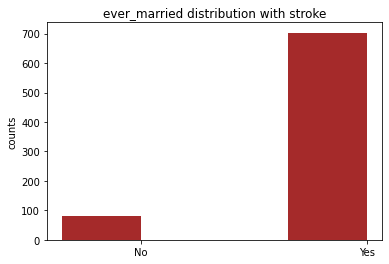

In [219]:
responses=spark.sql("SELECT ever_married, COUNT(ever_married) as ever_married_count, COUNT(ever_married) FROM table WHERE stroke== 1 GROUP BY ever_married").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('ever_married distribution with stroke')
plt.xticks(ind + width/2., categories)

In [220]:
spark.sql("SELECT Residence_type, count(Residence_type) as count_Residence_type, count(Residence_type)*100/sum(count(Residence_type)) over() as percent FROM table GROUP BY Residence_type").show()
spark.sql("SELECT Residence_type, COUNT(Residence_type) as Residence_type_count, COUNT(Residence_type)*100/(SELECT COUNT(Residence_type) FROM table WHERE Residence_type == 'Urban') as percentage FROM table WHERE stroke== 1 AND Residence_type = 'Urban' GROUP BY Residence_type").show()
spark.sql("SELECT Residence_type, COUNT(Residence_type) as Residence_type_count, COUNT(Residence_type)*100/(SELECT COUNT(Residence_type) FROM table WHERE Residence_type == 'Rural') as percentage FROM table WHERE stroke== 1 AND Residence_type = 'Rural' GROUP BY Residence_type").show()

+--------------+--------------------+-----------------+
|Residence_type|count_Residence_type|          percent|
+--------------+--------------------+-----------------+
|         Urban|               21756|50.12903225806452|
|         Rural|               21644|49.87096774193548|
+--------------+--------------------+-----------------+

+--------------+--------------------+-----------------+
|Residence_type|Residence_type_count|       percentage|
+--------------+--------------------+-----------------+
|         Urban|                 399|1.833976833976834|
+--------------+--------------------+-----------------+

+--------------+--------------------+------------------+
|Residence_type|Residence_type_count|        percentage|
+--------------+--------------------+------------------+
|         Rural|                 384|1.7741637405285529|
+--------------+--------------------+------------------+



([<matplotlib.axis.XTick at 0x7fb7fb925f60>,
 [Text(0, 0, 'Urban'), Text(0, 0, 'Rural')])

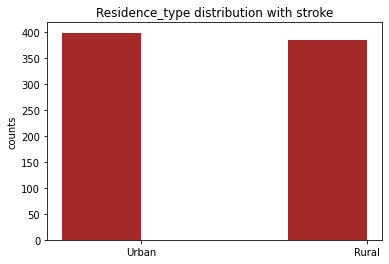

In [221]:
responses=spark.sql("SELECT Residence_type, COUNT(Residence_type) as Residence_type_count, COUNT(Residence_type) FROM table WHERE stroke== 1 GROUP BY Residence_type").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('Residence_type distribution with stroke')
plt.xticks(ind + width/2., categories)

In [222]:
spark.sql("SELECT avg_glucose_level, count(avg_glucose_level) as avg_glucose_level_count FROM table WHERE stroke == 1 GROUP BY avg_glucose_level ORDER BY avg_glucose_level_count DESC").show()
print(train.filter((train['stroke'] == 1) & (train['avg_glucose_level'] < 150)).count())
spark.sql("SELECT COUNT(avg_glucose_level)*100/(SELECT COUNT(avg_glucose_level) FROM table WHERE stroke ==1) as percentage FROM table WHERE stroke == 1 AND avg_glucose_level<150").show()

+-----------------+-----------------------+
|avg_glucose_level|avg_glucose_level_count|
+-----------------+-----------------------+
|            74.95|                      3|
|           210.08|                      2|
|           136.79|                      2|
|             74.9|                      2|
|           101.45|                      2|
|           206.74|                      2|
|            85.94|                      2|
|            88.57|                      2|
|           209.44|                      2|
|           220.18|                      2|
|            96.97|                      2|
|           189.69|                      2|
|           111.81|                      2|
|            65.12|                      2|
|           113.35|                      2|
|            60.98|                      1|
|           188.09|                      1|
|             64.2|                      1|
|            76.46|                      1|
|            85.86|             

Text(0.5, 1.0, 'avg_glucose_level distribution with stroke')

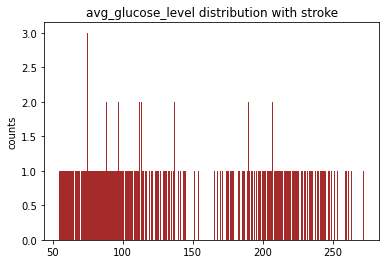

In [223]:
responses=spark.sql("SELECT avg_glucose_level, count(avg_glucose_level) as avg_glucose_level_count FROM table WHERE stroke == 1 GROUP BY avg_glucose_level ORDER BY avg_glucose_level").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
#plt.figure(figsize=(25, 5))
plt.bar(categories, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('avg_glucose_level distribution with stroke')

In [224]:
spark.sql("SELECT smoking_status, count(smoking_status) as count_smoking_status, count(smoking_status)*100/sum(count(smoking_status)) over() as percent FROM table GROUP BY smoking_status").show()
spark.sql("SELECT smoking_status, COUNT(smoking_status) as smoking_status_count, COUNT(smoking_status)*100/(SELECT COUNT(smoking_status) FROM table WHERE smoking_status == 'smokes') as percentage FROM table WHERE stroke== 1 AND smoking_status = 'smokes' GROUP BY smoking_status").show()
spark.sql("SELECT smoking_status, COUNT(smoking_status) as smoking_status_count, COUNT(smoking_status)*100/(SELECT COUNT(smoking_status) FROM table WHERE smoking_status == 'formerly smoked') as percentage FROM table WHERE stroke== 1 AND smoking_status = 'formerly smoked' GROUP BY smoking_status").show()
spark.sql("SELECT smoking_status, COUNT(smoking_status) as smoking_status_count, COUNT(smoking_status)*100/(SELECT COUNT(smoking_status) FROM table WHERE smoking_status == 'never smoked') as percentage FROM table WHERE stroke== 1 AND smoking_status = 'never smoked' GROUP BY smoking_status").show()

+---------------+--------------------+------------------+
| smoking_status|count_smoking_status|           percent|
+---------------+--------------------+------------------+
|           null|                   0|               0.0|
|         smokes|                6562|21.794871794871796|
|   never smoked|               16053|53.318055001992825|
|formerly smoked|                7493| 24.88707320313538|
+---------------+--------------------+------------------+

+--------------+--------------------+------------------+
|smoking_status|smoking_status_count|        percentage|
+--------------+--------------------+------------------+
|        smokes|                 133|2.0268210911307527|
+--------------+--------------------+------------------+

+---------------+--------------------+------------------+
| smoking_status|smoking_status_count|        percentage|
+---------------+--------------------+------------------+
|formerly smoked|                 221|2.9494194581609503|
+---------------+

([<matplotlib.axis.XTick at 0x7fb7fadb19e8>,
 [Text(0, 0, ''),
  Text(0, 0, 'smokes'),
  Text(0, 0, 'never smoked'),
  Text(0, 0, 'formerly smoked')])

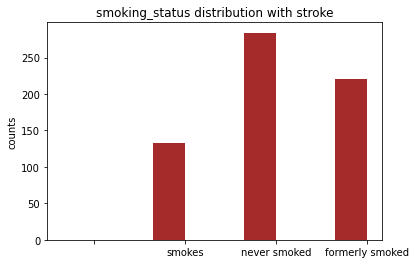

In [225]:
responses=spark.sql("SELECT smoking_status, COUNT(smoking_status) as smoking_status_count, COUNT(smoking_status) FROM table WHERE stroke== 1 GROUP BY smoking_status").collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='brown')
 
plt.ylabel('counts')
plt.title('smoking_status distribution with stroke')
plt.xticks(ind + width/2., categories)

###Cleaning up training data

In [226]:
train.describe().show()

+-------+-----------------+------+------------------+-------------------+-------------------+------------+---------+--------------+------------------+------------------+---------------+-------------------+
|summary|               id|gender|               age|       hypertension|      heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi| smoking_status|             stroke|
+-------+-----------------+------+------------------+-------------------+-------------------+------------+---------+--------------+------------------+------------------+---------------+-------------------+
|  count|            43400| 43400|             43400|              43400|              43400|       43400|    43400|         43400|             43400|             41938|          30108|              43400|
|   mean|36326.14235023042|  null| 42.21789400921646|0.09357142857142857|0.04751152073732719|        null|     null|          null|104.48274999999916|28.605038390004545|       

### 1. Here we see that there are few missing values in smoking_status and bmi column
### 2. Also there are few categorical data (gender, ever_married, work_type, Residence_type, smoking_status which we need to covert into one hot encoding

In [227]:
# fill in missing values for smoking status
# As this is categorical data, we will add one data type "No Info" for the missing one
train_f = train.na.fill('No Info', subset=['smoking_status'])
test_f = test.na.fill('No Info', subset=['smoking_status'])

In [228]:
# fill in miss values for bmi 
# as this is numecial data , we will simple fill the missing values with mean
from pyspark.sql.functions import mean
mean = train_f.select(mean(train_f['bmi'])).collect()
mean_bmi = mean[0][0]
train_f = train_f.na.fill(mean_bmi,['bmi'])
test_f = test_f.na.fill(mean_bmi,['bmi'])

In [229]:
train_f.describe().show()

+-------+-----------------+------+------------------+-------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|summary|               id|gender|               age|       hypertension|      heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi|smoking_status|             stroke|
+-------+-----------------+------+------------------+-------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|  count|            43400| 43400|             43400|              43400|              43400|       43400|    43400|         43400|             43400|             43400|         43400|              43400|
|   mean|36326.14235023042|  null| 42.21789400921646|0.09357142857142857|0.04751152073732719|        null|     null|          null|104.48274999999916|28.605038390005145|          n

In [230]:
test_f.describe().show()

+-------+------------------+------+------------------+-------------------+--------------------+------------+---------+--------------+------------------+------------------+--------------+
|summary|                id|gender|               age|       hypertension|       heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi|smoking_status|
+-------+------------------+------+------------------+-------------------+--------------------+------------+---------+--------------+------------------+------------------+--------------+
|  count|             18601| 18601|             18601|              18601|               18601|       18601|    18601|         18601|             18601|             18601|         18601|
|   mean| 36747.36804472878|  null|42.056504489006024|0.09316703403042847|0.048061932154185256|        null|     null|          null| 104.3863593355191|28.547222068087624|          null|
| stddev|21053.151123778684|  null|22.528017622414048|0.290674182

In [231]:
#Verifying that there are no null values in train and test dataset and that all null values are filled

print ("train dataset")
from pyspark.sql.functions import col,sum
train_f.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in train_f.columns)).show()

print ("test dataset")
from pyspark.sql.functions import col,sum
test_f.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in test_f.columns)).show()

train dataset
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+

test dataset
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+-

In [232]:
#Converting spark dataframe to pandas datasframe to perform visualization using matplotlib.
train_pandas = train.toPandas()
train_f_pandas = train_f.toPandas()

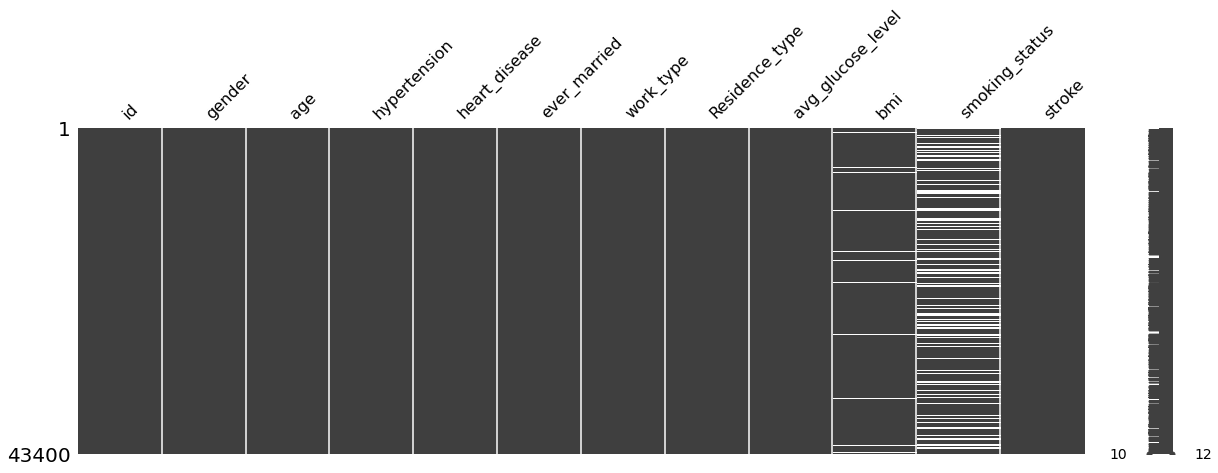

In [233]:
#Visualization of null values in the train dataset
mno.matrix(train_pandas, figsize = (20, 6))

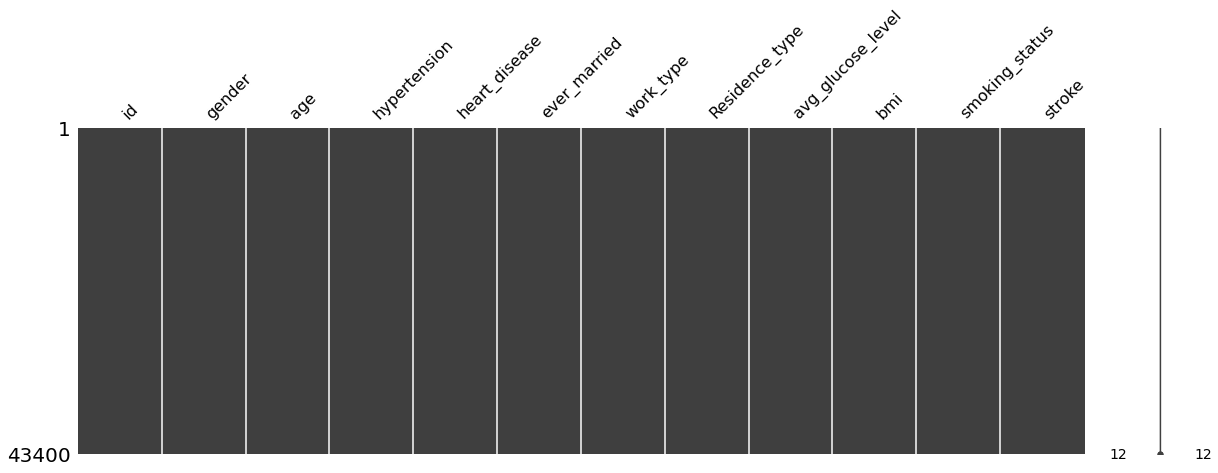

In [234]:
#visualization of imputation/filled null values
mno.matrix(train_f_pandas, figsize = (20, 6))

###Statistics on filtered data

In [235]:
#changing dataype /schema (convert string to int)
train_filtered = train_f.selectExpr("cast(age as int) age","cast(heart_disease as int) heart_disease","cast(hypertension as int) hypertension", "cast(avg_glucose_level as int) avg_glucose_level", "cast(bmi as int) bmi", "cast(stroke as int) stroke")

In [236]:
#correlation
print("Correlation between hypertension and heart disease")
train_filtered.corr('hypertension','heart_disease')

Correlation between hypertension and heart disease


0.11977702589069329

In [237]:
print("Correlation between hypertension and stroke")
train_filtered.corr('hypertension','stroke')

Correlation between hypertension and stroke


0.07533224882587929

In [238]:
print("Correlation between heartdisease and stroke")
train_filtered.corr('heart_disease','stroke')

Correlation between heartdisease and stroke


0.11376293746830315

In [239]:
print("Correlation between avg_glucose_level and stroke")
train_filtered.corr('avg_glucose_level','stroke')

Correlation between avg_glucose_level and stroke


0.07888289858870635

In [240]:
print("Correlation between bmi and stroke")
train_filtered.corr('bmi','stroke')

Correlation between bmi and stroke


0.017913037280289642

In [241]:
print("Correlation between avg_glucose_level and stroke")
train_filtered.corr('age','stroke')

Correlation between avg_glucose_level and stroke


0.15596073942249075

In [242]:
#covariance
print("Covariance  between hypertension and heart disease")
train_filtered.cov('hypertension','heart_disease')

Covariance  between hypertension and heart disease


0.007420809564407381

In [243]:
print("Covariance between hypertension and stroke")
train_filtered.cov('hypertension','stroke')

Covariance between hypertension and stroke


0.002920195659544516

In [244]:
print("Covariance between heartdisease and stroke")
train_filtered.cov('heart_disease','stroke')

Covariance between heartdisease and stroke


0.0032212373387099386

In [245]:
print("Covariance between avg_glucose_level and stroke")
train_filtered.cov('avg_glucose_level','stroke')

Covariance between avg_glucose_level and stroke


0.45262949899140714

In [246]:
print("Covariance between bmi and stroke")
train_filtered.cov('bmi','stroke')

Covariance between bmi and stroke


0.018210037543603064

In [247]:
print("Covariance between age and stroke")
train_filtered.cov('age','stroke')

Covariance between age and stroke


0.4679696037720114

Now there is no missing values, Lets work on categorical columns now..

###Balancing 

### Oversampling

In [248]:
from pyspark.sql.functions import col, explode, array, lit
train_f_unbalanced=train_f
train_f_unbalanced
major_df = train_f_unbalanced.filter(col("stroke") == 0)
minor_df = train_f_unbalanced.filter(col("stroke") == 1)
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))

ratio: 54


In [249]:
a = range(ratio)
# duplicate the minority rows
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
# combine both oversampled minority rows and previous majority rows 
balanced_oversampled = major_df.unionAll(oversampled_df)
balanced_oversampled.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|30669|  Male| 3.0|           0|            0|          No|     children|         Rural|            95.12|18.0|        No Info|     0|
|30468|  Male|58.0|           1|            0|         Yes|      Private|         Urban|            87.96|39.2|   never smoked|     0|
|16523|Female| 8.0|           0|            0|          No|      Private|         Urban|           110.89|17.6|        No Info|     0|
|56543|Female|70.0|           0|            0|         Yes|      Private|         Rural|            69.04|35.9|formerly smoked|     0|
|46136|  Male|14.0|           0|            0|         

###Undersampling

In [250]:
sampled_majority_df = major_df.sample(False, 1/ratio)
balanced_undersampled = sampled_majority_df.unionAll(minor_df)
balanced_undersampled.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|17986|Female|79.0|           0|            1|         Yes|Self-employed|         Urban|            67.84|25.2|         smokes|     0|
|41940|  Male|57.0|           0|            1|         Yes|      Private|         Rural|             62.2|31.0|formerly smoked|     0|
|21956|Female|22.0|           0|            0|          No|      Private|         Urban|            69.94|22.8|        No Info|     0|
|27832|Female|51.0|           0|            0|         Yes|      Private|         Rural|            82.93|29.7|         smokes|     0|
|29933|Female| 5.0|           0|            0|         

###StringIndexer -> OneHotEncoder -> VectorAssembler

In [251]:
# indexing all categorical columns in the dataset
from pyspark.ml.feature import StringIndexer
indexer1 = StringIndexer(inputCol="gender", outputCol="genderIndex")
indexer2 = StringIndexer(inputCol="ever_married", outputCol="ever_marriedIndex")
indexer3 = StringIndexer(inputCol="work_type", outputCol="work_typeIndex")
indexer4 = StringIndexer(inputCol="Residence_type", outputCol="Residence_typeIndex")
indexer5 = StringIndexer(inputCol="smoking_status", outputCol="smoking_statusIndex")

In [252]:
# Doing one hot encoding of indexed data
from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(inputCols=["genderIndex","ever_marriedIndex","work_typeIndex","Residence_typeIndex","smoking_statusIndex"],
                                 outputCols=["genderVec","ever_marriedVec","work_typeVec","Residence_typeVec","smoking_statusVec"])

In [253]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['genderVec',
 'age',
 'hypertension',
 'heart_disease',
 'ever_marriedVec',
 'work_typeVec',
 'Residence_typeVec',
 'avg_glucose_level',
 'bmi',
 'smoking_statusVec'],outputCol='features')

The next step is to create an assembler, that combines a given list of columns into a single vector column to train ML model. I will use the vector columns, that we got after one_hot_encoding.

###Baseline model

###Logistic Regression classifier for baseline model

In [254]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression( labelCol='stroke',featuresCol='features')

So far we have kind of a complex task that contains bunch of stages, that need to be performed to process data. To wrap all of that Spark ML represents such a workflow as a Pipeline, which consists of a sequence of PipelineStages to be run in a specific order.

In [255]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[indexer1, indexer2, indexer3, indexer4, indexer5, encoder, assembler, lr])

The next step is to split dataset to train and test to train the model and make predictions.

In [260]:
# splitting training and validation data
train_data_unbalanced, val_data_unbalanced = train_f_unbalanced.randomSplit([0.7,0.3])
train_data_balanced_oversampled,val_data_balanced_oversampled = balanced_oversampled.randomSplit([0.7,0.3])
train_data_balanced_undersampled,val_data_balanced_undersampled = balanced_undersampled.randomSplit([0.7,0.3])

# training model pipeline with data
model_unbalanced = pipeline.fit(train_data_unbalanced)
model_balanced_oversampled = pipeline.fit(train_data_balanced_oversampled)
model_balanced_undersampled = pipeline.fit(train_data_balanced_undersampled)

Now we will evaluate the model with validation data

In [261]:
# making prediction on model with validation data
lr_predictions_unbalanced = model_unbalanced.transform(val_data_unbalanced)
lr_predictions_balanced_oversampled = model_balanced_oversampled.transform(val_data_balanced_oversampled)
lr_predictions_balanced_undersampled = model_balanced_undersampled.transform(val_data_balanced_undersampled)

# Select example rows to display.
lr_predictions_unbalanced.select("prediction","probability", "stroke", "features").show(5)
lr_predictions_balanced_oversampled.select("prediction","probability", "stroke", "features").show(5)
lr_predictions_balanced_undersampled.select("prediction","probability", "stroke", "features").show(5)

+----------+--------------------+------+--------------------+
|prediction|         probability|stroke|            features|
+----------+--------------------+------+--------------------+
|       0.0|[0.93875708275404...|     0|(16,[0,2,5,6,10,1...|
|       0.0|[0.98974431143545...|     0|(16,[0,2,5,6,11,1...|
|       0.0|[0.96090319480712...|     0|(16,[0,2,9,11,12,...|
|       0.0|[0.97081400807478...|     0|(16,[0,2,5,6,11,1...|
|       0.0|[0.99979562079736...|     0|(16,[1,2,8,11,12,...|
+----------+--------------------+------+--------------------+
only showing top 5 rows

+----------+--------------------+------+--------------------+
|prediction|         probability|stroke|            features|
+----------+--------------------+------+--------------------+
|       0.0|[0.84247284965999...|     0|(16,[0,2,5,6,11,1...|
|       1.0|[0.38825678815390...|     0|(16,[0,2,5,6,10,1...|
|       0.0|[0.98526424781856...|     0|(16,[1,2,9,11,12,...|
|       0.0|[0.70260109795578...|     0|(16,[

In [262]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error
acc_evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="accuracy")
lr_acc_unbalanced = acc_evaluator.evaluate(lr_predictions_unbalanced)
lr_acc_balanced_oversampled = acc_evaluator.evaluate(lr_predictions_balanced_oversampled)
lr_acc_balanced_undersampled = acc_evaluator.evaluate(lr_predictions_balanced_undersampled)
print('Unbalanced A Logistic Regression algorithm had an accuracy of: {0:2.2f}%'.format(lr_acc_unbalanced*100))
print('Balanced Oversampled A Logistic Regression algorithm had an accuracy of: {0:2.2f}%'.format(lr_acc_balanced_oversampled*100))
print('Balanced Undersampled A Logistic Regression algorithm had an accuracy of: {0:2.2f}%'.format(lr_acc_balanced_undersampled*100))

Unbalanced A Logistic Regression algorithm had an accuracy of: 98.11%
Balanced Oversampled A Logistic Regression algorithm had an accuracy of: 77.61%
Balanced Undersampled A Logistic Regression algorithm had an accuracy of: 77.73%


In [264]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results_unbalanced = lr_predictions_unbalanced.select(['probability', 'stroke'])
results_balanced_oversampled = lr_predictions_balanced_oversampled.select(['probability', 'stroke'])
results_balanced_undersampled = lr_predictions_balanced_undersampled.select(['probability', 'stroke'])
 
## prepare score-label set
results_collect_unbalanced = results_unbalanced.collect()
results_collect_balanced_oversampled = results_balanced_oversampled.collect()
results_collect_balanced_undersampled = results_balanced_undersampled.collect()

results_list_unbalanced = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect_unbalanced]
results_list_balanced_oversampled = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect_balanced_oversampled]
results_list_balanced_undersampled = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect_balanced_undersampled]
scoreAndLabels_unbalanced = sc.parallelize(results_list_unbalanced)
scoreAndLabels_balanced_oversampled = sc.parallelize(results_list_balanced_oversampled)
scoreAndLabels_balanced_undersampled = sc.parallelize(results_list_balanced_undersampled)
 
metrics_unbalanced = metric(scoreAndLabels_unbalanced)
metrics_balanced_oversampled = metric(scoreAndLabels_balanced_oversampled)
metrics_balanced_undersampled = metric(scoreAndLabels_balanced_undersampled)

print("Unbalanced Test Data Aread under ROC score is : ", metrics_unbalanced.areaUnderROC)
print("Balanced Oversampled Test Data Aread under ROC score is : ", metrics_balanced_oversampled.areaUnderROC)
print("Balanced Undersampled Test Data Aread under ROC score is : ", metrics_balanced_undersampled.areaUnderROC)

Unbalanced Test Data Aread under ROC score is :  0.8484952488122034
Balanced Oversampled Test Data Aread under ROC score is :  0.8486422324755601
Balanced Undersampled Test Data Aread under ROC score is :  0.854502127659575


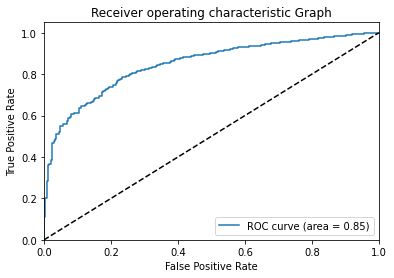

In [265]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list_unbalanced]
y_score = [i[0] for i in results_list_unbalanced]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

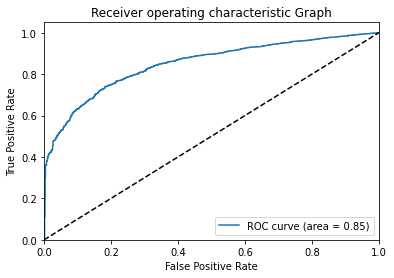

In [266]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list_balanced_oversampled]
y_score = [i[0] for i in results_list_balanced_oversampled]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

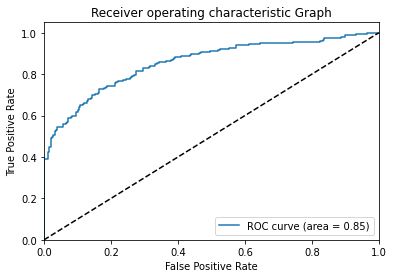

In [267]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list_balanced_undersampled]
y_score = [i[0] for i in results_list_balanced_undersampled]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

In [268]:
# now predicting the labels for test data
test_pred = model_unbalanced.transform(test_f)
test_selected = test_pred.select("id", "features", "prediction","probability")
test_selected.limit(5).toPandas()

,id,features,prediction,probability
0,36306,"(0.0, 1.0, 80.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,...",0.0,"[0.9271012544064664, 0.07289874559353354]"
1,61829,"(1.0, 0.0, 74.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0,...",0.0,"[0.8961431865371376, 0.10385681346286231]"
2,14152,"(1.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0.0,"[0.9996231191794154, 0.00037688082058462776]"
3,12997,"(0.0, 1.0, 28.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",0.0,"[0.9982234023714531, 0.0017765976285467396]"
4,40801,"(1.0, 0.0, 63.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.0,"[0.9806489434236353, 0.01935105657636484]"


In [269]:
test_pred = model_balanced_oversampled.transform(test_f)
test_selected = test_pred.select("id", "features", "prediction","probability")
test_selected.limit(5).toPandas()

,id,features,prediction,probability
0,36306,"(0.0, 1.0, 80.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,...",1.0,"[0.16655289856479616, 0.8334471014352038]"
1,61829,"(1.0, 0.0, 74.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0,...",1.0,"[0.12085112762571605, 0.879148872374284]"
2,14152,"(1.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,"[0.9751733356984066, 0.02482666430159347]"
3,12997,"(0.0, 1.0, 28.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",0.0,"[0.9096721955403186, 0.0903278044596814]"
4,40801,"(1.0, 0.0, 63.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,...",0.0,"[0.5650243367338373, 0.43497566326616266]"


In [270]:
test_pred = model_balanced_undersampled.transform(test_f)
test_selected = test_pred.select("id", "features", "prediction","probability")
test_selected.limit(5).toPandas()

,id,features,prediction,probability
0,36306,"(0.0, 80.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0,...",1.0,"[0.21943204932804591, 0.7805679506719541]"
1,61829,"[1.0, 74.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0,...",1.0,"[0.14293469427880537, 0.8570653057211947]"
2,14152,"(1.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0.0,"[0.9706018883030425, 0.02939811169695743]"
3,12997,"(0.0, 28.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.0,"[0.9228222608343595, 0.07717773916564061]"
4,40801,"(1.0, 63.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,...",0.0,"[0.5816256181282182, 0.4183743818717816]"


###RandomForest classifier for baseline model

In [271]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol='stroke',featuresCol='features')

In [272]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[indexer1, indexer2, indexer3, indexer4, indexer5, encoder, assembler, rf])

In [273]:
# training model pipeline with data
model_unbalanced = pipeline.fit(train_data_unbalanced)
model_balanced_oversampled = pipeline.fit(train_data_balanced_oversampled)
model_balanced_undersampled = pipeline.fit(train_data_balanced_undersampled)

In [274]:
# making prediction on model with validation data
rf_predictions_unbalanced = model_unbalanced.transform(val_data_unbalanced)
rf_predictions_balanced_oversampled = model_balanced_oversampled.transform(val_data_balanced_oversampled)
rf_predictions_balanced_undersampled = model_balanced_undersampled.transform(val_data_balanced_undersampled)

# Select example rows to display.
rf_predictions_unbalanced.select("prediction","probability", "stroke", "features").show(5)
rf_predictions_balanced_oversampled.select("prediction","probability", "stroke", "features").show(5)
rf_predictions_balanced_undersampled.select("prediction","probability", "stroke", "features").show(5)


+----------+--------------------+------+--------------------+
|prediction|         probability|stroke|            features|
+----------+--------------------+------+--------------------+
|       0.0|[0.97605703236455...|     0|(16,[0,2,5,6,10,1...|
|       0.0|[0.98490069813092...|     0|(16,[0,2,5,6,11,1...|
|       0.0|[0.97427676520795...|     0|(16,[0,2,9,11,12,...|
|       0.0|[0.98465266176888...|     0|(16,[0,2,5,6,11,1...|
|       0.0|[0.98662767270288...|     0|(16,[1,2,8,11,12,...|
+----------+--------------------+------+--------------------+
only showing top 5 rows

+----------+--------------------+------+--------------------+
|prediction|         probability|stroke|            features|
+----------+--------------------+------+--------------------+
|       0.0|[0.74304977769315...|     0|(16,[0,2,5,6,11,1...|
|       1.0|[0.40622574686679...|     0|(16,[0,2,5,6,10,1...|
|       0.0|[0.92208558732168...|     0|(16,[1,2,9,11,12,...|
|       0.0|[0.63143520783088...|     0|(16,[

In [275]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error
acc_evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="accuracy")
rf_acc_unbalanced = acc_evaluator.evaluate(rf_predictions_unbalanced)
rf_acc_balanced_oversampled = acc_evaluator.evaluate(rf_predictions_balanced_oversampled)
rf_acc_balanced_undersampled = acc_evaluator.evaluate(rf_predictions_balanced_undersampled)
print('Unbalanced A Logistic Regression algorithm had an accuracy of: {0:2.2f}%'.format(rf_acc_unbalanced*100))
print('Balanced Oversampled A Logistic Regression algorithm had an accuracy of: {0:2.2f}%'.format(rf_acc_balanced_oversampled*100))
print('Balanced Undersampled A Logistic Regression algorithm had an accuracy of: {0:2.2f}%'.format(rf_acc_balanced_undersampled*100))

Unbalanced A Logistic Regression algorithm had an accuracy of: 98.11%
Balanced Oversampled A Logistic Regression algorithm had an accuracy of: 77.33%
Balanced Undersampled A Logistic Regression algorithm had an accuracy of: 77.32%


In [277]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results_unbalanced = rf_predictions_unbalanced.select(['probability', 'stroke'])
results_balanced_oversampled = rf_predictions_balanced_oversampled.select(['probability', 'stroke'])
results_balanced_undersampled = rf_predictions_balanced_undersampled.select(['probability', 'stroke'])
 
## prepare score-label set
results_collect_unbalanced = results_unbalanced.collect()
results_collect_balanced_oversampled = results_balanced_oversampled.collect()
results_collect_balanced_undersampled = results_balanced_undersampled.collect()

results_list_unbalanced = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect_unbalanced]
results_list_balanced_oversampled = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect_balanced_oversampled]
results_list_balanced_undersampled = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect_balanced_undersampled]
scoreAndLabels_unbalanced = sc.parallelize(results_list_unbalanced)
scoreAndLabels_balanced_oversampled = sc.parallelize(results_list_balanced_oversampled)
scoreAndLabels_balanced_undersampled = sc.parallelize(results_list_balanced_undersampled)
 
metrics_unbalanced = metric(scoreAndLabels_unbalanced)
metrics_balanced_oversampled = metric(scoreAndLabels_balanced_oversampled)
metrics_balanced_undersampled = metric(scoreAndLabels_balanced_undersampled)

print("Unbalanced Test Data Aread under ROC score is : ", metrics_unbalanced.areaUnderROC)
print("Balanced Oversampled Test Data Aread under ROC score is : ", metrics_balanced_oversampled.areaUnderROC)
print("Balanced Undersampled Test Data Aread under ROC score is : ", metrics_balanced_undersampled.areaUnderROC)

Unbalanced Test Data Aread under ROC score is :  0.8021730432608154
Balanced Oversampled Test Data Aread under ROC score is :  0.8541242630089874
Balanced Undersampled Test Data Aread under ROC score is :  0.8332170212765941


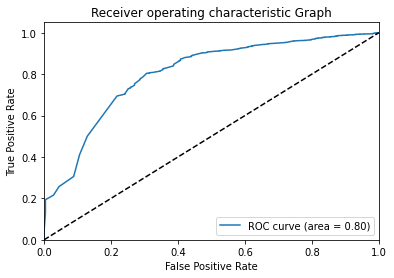

In [279]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list_unbalanced]
y_score = [i[0] for i in results_list_unbalanced]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

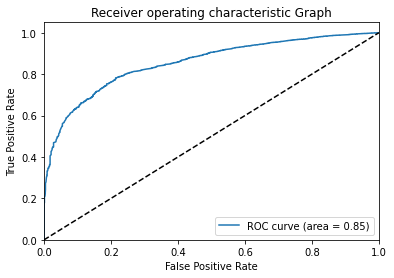

In [280]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list_balanced_oversampled]
y_score = [i[0] for i in results_list_balanced_oversampled]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

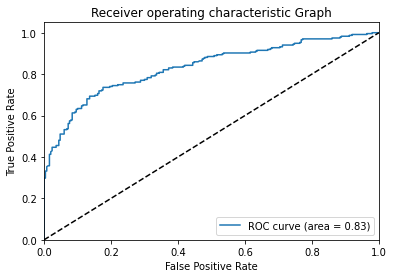

In [281]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list_balanced_undersampled]
y_score = [i[0] for i in results_list_balanced_undersampled]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

In [282]:
# now predicting the labels for test data
test_pred = model_unbalanced.transform(test_f)
test_selected = test_pred.select("id", "features", "prediction","probability")
test_selected.limit(5).toPandas()

,id,features,prediction,probability
0,36306,"(0.0, 1.0, 80.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,...",0.0,"[0.9732338724147693, 0.026766127585230715]"
1,61829,"(1.0, 0.0, 74.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0,...",0.0,"[0.9443088443436046, 0.05569115565639543]"
2,14152,"(1.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0.0,"[0.9866276727028829, 0.013372327297117025]"
3,12997,"(0.0, 1.0, 28.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",0.0,"[0.9859223078538448, 0.014077692146155087]"
4,40801,"(1.0, 0.0, 63.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.0,"[0.9846526617688844, 0.0153473382311155]"


In [283]:
# now predicting the labels for test data
test_pred = model_balanced_oversampled.transform(test_f)
test_selected = test_pred.select("id", "features", "prediction","probability")
test_selected.limit(5).toPandas()

,id,features,prediction,probability
0,36306,"(0.0, 1.0, 80.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,...",1.0,"[0.3117816332530201, 0.6882183667469799]"
1,61829,"(1.0, 0.0, 74.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0,...",1.0,"[0.1875760612238302, 0.8124239387761698]"
2,14152,"(1.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,"[0.9220855873216838, 0.07791441267831624]"
3,12997,"(0.0, 1.0, 28.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",0.0,"[0.8464637830279668, 0.15353621697203332]"
4,40801,"(1.0, 0.0, 63.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,...",1.0,"[0.4381315150797363, 0.5618684849202636]"


In [284]:
# now predicting the labels for test data
test_pred = model_balanced_undersampled.transform(test_f)
test_selected = test_pred.select("id", "features", "prediction","probability")
test_selected.limit(5).toPandas()

,id,features,prediction,probability
0,36306,"(0.0, 80.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0,...",1.0,"[0.3098528858740754, 0.6901471141259246]"
1,61829,"[1.0, 74.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0,...",1.0,"[0.17293348945167952, 0.8270665105483205]"
2,14152,"(1.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0.0,"[0.9133605662826921, 0.0866394337173079]"
3,12997,"(0.0, 28.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.0,"[0.9361703310219921, 0.06382966897800782]"
4,40801,"(1.0, 63.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,...",1.0,"[0.4426540835838808, 0.5573459164161191]"


SVC classifier for baseline model

In [285]:
from pyspark.ml.classification import LinearSVC
svc = LinearSVC(labelCol='stroke',featuresCol='features')

In [286]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[indexer1, indexer2, indexer3, indexer4, indexer5, encoder, assembler, svc])

In [287]:
# training model pipeline with data
model_unbalanced = pipeline.fit(train_data_unbalanced)
model_balanced_oversampled = pipeline.fit(train_data_balanced_oversampled)
model_balanced_undersampled = pipeline.fit(train_data_balanced_undersampled)

In [290]:
# making prediction on model with validation data
svc_predictions_unbalanced = model_unbalanced.transform(val_data_unbalanced)
svc_predictions_balanced_oversampled = model_balanced_oversampled.transform(val_data_balanced_oversampled)
svc_predictions_balanced_undersampled = model_balanced_undersampled.transform(val_data_balanced_undersampled)
print(svc_predictions_unbalanced)
# Select example rows to display.
svc_predictions_unbalanced.select("prediction","rawPrediction", "stroke", "features").show(5)
svc_predictions_balanced_oversampled.select("prediction","rawPrediction", "stroke", "features").show(5)
svc_predictions_balanced_undersampled.select("prediction","rawPrediction", "stroke", "features").show(5)

DataFrame[id: int, gender: string, age: double, hypertension: int, heart_disease: int, ever_married: string, work_type: string, Residence_type: string, avg_glucose_level: double, bmi: double, smoking_status: string, stroke: int, genderIndex: double, ever_marriedIndex: double, work_typeIndex: double, Residence_typeIndex: double, smoking_statusIndex: double, ever_marriedVec: vector, genderVec: vector, smoking_statusVec: vector, work_typeVec: vector, Residence_typeVec: vector, features: vector, rawPrediction: vector, prediction: double]
+----------+--------------------+------+--------------------+
|prediction|       rawPrediction|stroke|            features|
+----------+--------------------+------+--------------------+
|       0.0|[1.00392747067572...|     0|(16,[0,2,5,6,10,1...|
|       0.0|[1.02964539361242...|     0|(16,[0,2,5,6,11,1...|
|       0.0|[1.04535191694040...|     0|(16,[0,2,9,11,12,...|
|       0.0|[1.01679713498858...|     0|(16,[0,2,5,6,11,1...|
|       0.0|[1.56818331209

In [291]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error
acc_evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="accuracy")
svc_acc_unbalanced = acc_evaluator.evaluate(svc_predictions_unbalanced)
svc_acc_balanced_oversampled = acc_evaluator.evaluate(svc_predictions_balanced_oversampled)
svc_acc_balanced_undersampled = acc_evaluator.evaluate(svc_predictions_balanced_undersampled)
print('Unbalanced A Logistic Regression algorithm had an accuracy of: {0:2.2f}%'.format(svc_acc_unbalanced*100))
print('Balanced Oversampled A Logistic Regression algorithm had an accuracy of: {0:2.2f}%'.format(svc_acc_balanced_oversampled*100))
print('Balanced Undersampled A Logistic Regression algorithm had an accuracy of: {0:2.2f}%'.format(svc_acc_balanced_undersampled*100))

Unbalanced A Logistic Regression algorithm had an accuracy of: 98.11%
Balanced Oversampled A Logistic Regression algorithm had an accuracy of: 77.22%
Balanced Undersampled A Logistic Regression algorithm had an accuracy of: 78.14%


In [294]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results_unbalanced = svc_predictions_unbalanced.select(['rawPrediction', 'stroke'])
results_balanced_oversampled = svc_predictions_balanced_oversampled.select(['rawPrediction', 'stroke'])
results_balanced_undersampled = svc_predictions_balanced_undersampled.select(['rawPrediction', 'stroke'])
 
## prepare score-label set
results_collect_unbalanced = results_unbalanced.collect()
results_collect_balanced_oversampled = results_balanced_oversampled.collect()
results_collect_balanced_undersampled = results_balanced_undersampled.collect()

results_list_unbalanced = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect_unbalanced]
results_list_balanced_oversampled = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect_balanced_oversampled]
results_list_balanced_undersampled = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect_balanced_undersampled]
scoreAndLabels_unbalanced = sc.parallelize(results_list_unbalanced)
scoreAndLabels_balanced_oversampled = sc.parallelize(results_list_balanced_oversampled)
scoreAndLabels_balanced_undersampled = sc.parallelize(results_list_balanced_undersampled)
 
metrics_unbalanced = metric(scoreAndLabels_unbalanced)
metrics_balanced_oversampled = metric(scoreAndLabels_balanced_oversampled)
metrics_balanced_undersampled = metric(scoreAndLabels_balanced_undersampled)

print("Unbalanced Test Data Aread under ROC score is : ", metrics_unbalanced.areaUnderROC)
print("Balanced Oversampled Test Data Aread under ROC score is : ", metrics_balanced_oversampled.areaUnderROC)
print("Balanced Undersampled Test Data Aread under ROC score is : ", metrics_balanced_undersampled.areaUnderROC)

Unbalanced Test Data Aread under ROC score is :  0.8101853588397104
Balanced Oversampled Test Data Aread under ROC score is :  0.8488369983068019
Balanced Undersampled Test Data Aread under ROC score is :  0.8555404255319154


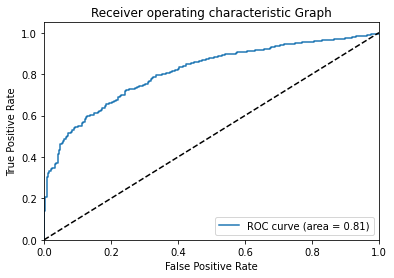

In [295]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list_unbalanced]
y_score = [i[0] for i in results_list_unbalanced]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

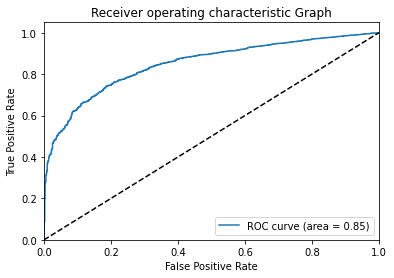

In [296]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list_balanced_oversampled]
y_score = [i[0] for i in results_list_balanced_oversampled]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

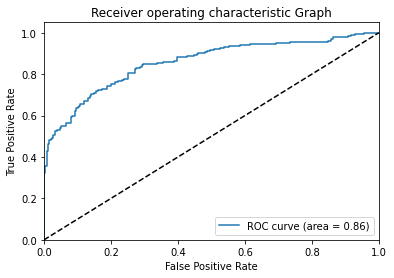

In [297]:
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list_balanced_undersampled]
y_score = [i[0] for i in results_list_balanced_undersampled]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

In [298]:
# now predicting the labels for test data
test_pred = model_unbalanced.transform(test_f)
test_selected = test_pred.select("id", "features", "prediction","rawPrediction")
test_selected.limit(5).toPandas()

,id,features,prediction,rawPrediction
0,36306,"(0.0, 1.0, 80.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,...",0.0,"[1.001990019681339, -1.001990019681339]"
1,61829,"(1.0, 0.0, 74.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0,...",0.0,"[1.0085624071185295, -1.0085624071185295]"
2,14152,"(1.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0.0,"[1.5557702887720395, -1.5557702887720395]"
3,12997,"(0.0, 1.0, 28.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",0.0,"[1.107256953466142, -1.107256953466142]"
4,40801,"(1.0, 0.0, 63.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.0,"[1.0212164359736744, -1.0212164359736744]"


In [299]:
# now predicting the labels for test data
test_pred = model_balanced_oversampled.transform(test_f)
test_selected = test_pred.select("id", "features", "prediction","rawPrediction")
test_selected.limit(5).toPandas()

,id,features,prediction,rawPrediction
0,36306,"(0.0, 1.0, 80.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,...",1.0,"[-1.2908062380319287, 1.2908062380319287]"
1,61829,"(1.0, 0.0, 74.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0,...",1.0,"[-1.6199603191488892, 1.6199603191488892]"
2,14152,"(1.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,"[1.2221052410559157, -1.2221052410559157]"
3,12997,"(0.0, 1.0, 28.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",0.0,"[1.4956334912194897, -1.4956334912194897]"
4,40801,"(1.0, 0.0, 63.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,...",0.0,"[0.055040158654917404, -0.055040158654917404]"


In [300]:
# now predicting the labels for test data
test_pred = model_balanced_undersampled.transform(test_f)
test_selected = test_pred.select("id", "features", "prediction","rawPrediction")
test_selected.limit(5).toPandas()

,id,features,prediction,rawPrediction
0,36306,"(0.0, 80.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0,...",1.0,"[-1.2457330340863573, 1.2457330340863573]"
1,61829,"[1.0, 74.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0,...",1.0,"[-1.5032208261075284, 1.5032208261075284]"
2,14152,"(1.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0.0,"[1.3480791852191913, -1.3480791852191913]"
3,12997,"(0.0, 28.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.0,"[1.6842266978304166, -1.6842266978304166]"
4,40801,"(1.0, 63.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,...",0.0,"[0.2166990111878242, -0.2166990111878242]"
